# Multiple Linear Regression 

## Importing Libraries

In [1]:
import numpy as np

import pandas as pd
from numpy.linalg import inv
import matplotlib.pyplot as plt


## Importing the DataSet

In [2]:
dataset = pd.read_csv('G:/Jupyter Sketch/Regression/Multiple Linear Regression/Data/wine quality-red.csv')

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
cols = list(dataset.columns)


In [5]:
y = dataset.quality

In [6]:
cols.remove('quality')

In [7]:
dataset = dataset[cols]

## Mean Normalization

In [8]:
from sklearn import preprocessing
X = dataset.values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
dataset = pd.DataFrame(X_scaled)

In [9]:
min_max_scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
X_scaled

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [11]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [12]:
y = (y - np.min(y))/(np.max(y) - np.min(y))

In [13]:
X = np.array(dataset)

In [14]:
len(dataset)

1599

In [15]:
X0 = np.ones(shape = (len(dataset),1))

In [16]:
X0

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [17]:
X = np.concatenate((X0,X), axis =1)

In [18]:
X

array([[1.        , 0.24778761, 0.39726027, ..., 0.60629921, 0.13772455,
        0.15384615],
       [1.        , 0.28318584, 0.52054795, ..., 0.36220472, 0.20958084,
        0.21538462],
       [1.        , 0.28318584, 0.43835616, ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [1.        , 0.15044248, 0.26712329, ..., 0.53543307, 0.25149701,
        0.4       ],
       [1.        , 0.11504425, 0.35958904, ..., 0.65354331, 0.22754491,
        0.27692308],
       [1.        , 0.12389381, 0.13013699, ..., 0.51181102, 0.19760479,
        0.4       ]])

In [19]:
X.shape

(1599, 12)

In [20]:
y.shape

(1599,)

In [21]:
X.T.shape

(12, 1599)

## Normal Equation θ = Inv(X.XT).XT.Y

In [22]:
X_XT = np.dot(X.T,X)

In [23]:
X_XT_Inv = np.linalg.inv(X_XT)

In [24]:
X_XT_Inv.shape

(12, 12)

In [25]:
X_XT_Inv_XT = np.dot(X_XT_Inv, X.T)

In [26]:
X_XT_Inv_XT.shape

(12, 1599)

In [27]:
y.shape

(1599,)

In [28]:
thetas = np.dot(X_XT_Inv_XT, y)

In [29]:
thetas

array([ 0.5425106 ,  0.05647865, -0.31640836, -0.03651279,  0.04768731,
       -0.22453217,  0.06193093, -0.18477521, -0.04870829, -0.1050679 ,
        0.30605569,  0.35905701])

## Gradient Descent

In [30]:
y = np.array(y)
thetas_g = np.random.rand(1, len(cols)+1)
alpha = 0.01
m = len(dataset)
lr_ratio = alpha/m
cost_function = []
iterations = []

In [36]:
thetas_g.shape

(1, 12)

In [32]:
thetas_g

array([[0.09687382, 0.75087471, 0.4536539 , 0.92463663, 0.45205288,
        0.84697218, 0.22862471, 0.2504605 , 0.69919646, 0.80862742,
        0.83386995, 0.57721677]])

In [33]:
def gradient_descent(X, y, thetas_g, alpha, itrs):
    for i in range(itrs):
        for j in range(thetas_g.shape[1]):
            thetas_g[: j] = thetas_g[: j] - lr_ratio*(np.sum((np.dot(thetas_g, np.transpose(X))-y)*X[:, j]))
        cost_function.append(lr_ratio*(np.sum((np.dot(thetas_g, np.transpose(X))-y)**2)))
        iterations.append(i)
    return thetas_g       

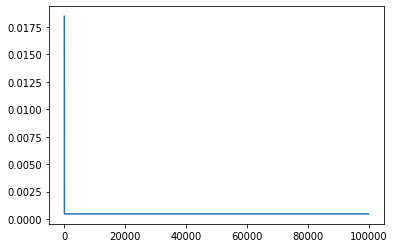

In [34]:
thetas = gradient_descent(X, y, thetas_g, alpha, 100000)
plt.plot(iterations, cost_function)

In [35]:
thetas

array([[-0.28665702,  0.36734388,  0.07012307,  0.5411058 ,  0.06852205,
         0.46344135, -0.15490612, -0.13307033,  0.31566563,  0.42509658,
         0.45033912,  0.19368594]])